<a href="https://colab.research.google.com/github/Cezari0o/PLN-Trab/blob/main/projeto_final/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project PLN
Gabriel Cesário Silva Martins - 180100912 

In this notebook, a data cleaning is done, as well as the dataset analysis. An extraction of features that can be used for training is also done.

# Mounting drive, extracting dataset from zip

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Symbolic link

In [3]:
!ln --symbolic /content/drive/MyDrive/UnB/PLN/projeto_final/ /dir

In [4]:
!ls /dir

LSTM_Classifier		       Mental-Health-Twitter-pre-processed.csv
Mental-Health-Twitter.csv      projeto_final
Mental-Health-Twitter.csv.zip  RNN_Classifier


In [5]:
%cd /dir/.

/content/drive/MyDrive/UnB/PLN/projeto_final


In [6]:
!ls .

LSTM_Classifier		       Mental-Health-Twitter-pre-processed.csv
Mental-Health-Twitter.csv      projeto_final
Mental-Health-Twitter.csv.zip  RNN_Classifier


In [ ]:
!unzip -n -l Mental-Health-Twitter.csv.zip

Archive:  Mental-Health-Twitter.csv.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  3490757  2022-08-06 14:26   Mental-Health-Twitter.csv
---------                     -------
  3490757                     1 file


# Reading the Dataset

The dataset used can be found [here](https://www.kaggle.com/datasets/infamouscoder/mental-health-social-media). Also, some packages and resources are imported/downloaded

Imports

In [7]:
import pandas as pd
import re
import nltk

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

Downloading packages from the nltk package

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Getting the stopwords list
stop_words_list = nltk.corpus.stopwords.words("english")

In [8]:
dt = pd.read_csv('Mental-Health-Twitter.csv')
dt

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [9]:
dt = dt.drop('Unnamed: 0', axis=1)
dt

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


## Exploratory Data Analysis
Counting the quantity of users

In [ ]:
users = set(dt['user_id'])

print(f"The dataset have {len(dt['post_text'])} tweets from {len(users)} users.")

The dataset have 20000 tweets from 72 users.


Counting the tweets per user.

In [ ]:
users_tweets_total = dict()

for idx, user_id in enumerate(dt['user_id']): 
  if(user_id in users_tweets_total):
    users_tweets_total[user_id] += 1
  else:
    users_tweets_total[user_id] = 1

# users_tweets_total

And counting the tweets per user, by label

In [11]:
users_tweets_count = dict()

for idx, user_id in enumerate(dt['user_id']): 
  if user_id in users_tweets_count:
    
    if dt['label'][idx] == 0:
      users_tweets_count[user_id]['non_depressed'] += 1
    else:
      users_tweets_count[user_id]['depressed'] += 1
  else:
    users_tweets_count[user_id] = dict()
    users_tweets_count[user_id]['non_depressed'] = users_tweets_count[user_id]['depressed'] = 0
     
    if dt['label'][idx] == 0:
      users_tweets_count[user_id]['non_depressed'] = 1
    else:
      users_tweets_count[user_id]['depressed'] = 1

users_tweets_count

{1013187241: {'non_depressed': 0, 'depressed': 243},
 3346224328: {'non_depressed': 0, 'depressed': 650},
 739069418: {'non_depressed': 0, 'depressed': 29},
 1383256561: {'non_depressed': 0, 'depressed': 56},
 2660477449: {'non_depressed': 0, 'depressed': 40},
 221788137: {'non_depressed': 0, 'depressed': 188},
 39248633: {'non_depressed': 0, 'depressed': 119},
 1629737760: {'non_depressed': 0, 'depressed': 177},
 1616997456: {'non_depressed': 0, 'depressed': 888},
 38988469: {'non_depressed': 0, 'depressed': 71},
 2828686140: {'non_depressed': 0, 'depressed': 29},
 3437541795: {'non_depressed': 0, 'depressed': 4},
 325328455: {'non_depressed': 0, 'depressed': 100},
 484109859: {'non_depressed': 0, 'depressed': 78},
 1942261957: {'non_depressed': 0, 'depressed': 62},
 74046089: {'non_depressed': 0, 'depressed': 50},
 3045320288: {'non_depressed': 0, 'depressed': 633},
 1058067937: {'non_depressed': 0, 'depressed': 161},
 377696171: {'non_depressed': 0, 'depressed': 332},
 26620439: {'n

And getting the average of tweets for each class

In [12]:
dp = 0
non_dp = 0

count_dp = 0
count_non_dp = 0
for u_id in users_tweets_count:

  if users_tweets_count[u_id]['non_depressed'] != 0:
    non_dp += users_tweets_count[u_id]['non_depressed']
    count_non_dp += 1

  else:
    dp += users_tweets_count[u_id]['depressed']
    count_dp += 1

mean_dp = dp / count_dp
mean_non_dp = non_dp / count_non_dp

print('About the users:\n', 'depresed:',count_dp, 'non_depressed:',count_non_dp)
print('Average number of tweets:\n','depressed:',mean_dp, 'non_depressed:',mean_non_dp)

About the users:
 depresed: 54 non_depressed: 18
Average number of tweets:
 depressed: 185.1851851851852 non_depressed: 555.5555555555555


Ploting the total quantity of tweets, by labels. The dataset have a equal distribuition of tweets.

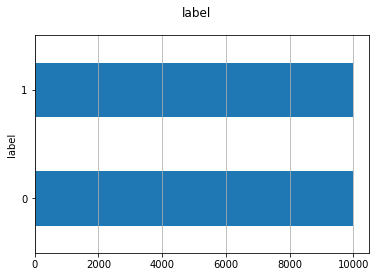

In [ ]:
x = 'label'

fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
dt[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

## Extracting features

A data inference process is conducted here.

Classifing texts in RTs

In [ ]:
finder = re.compile(r'RT\s@[\w]+:')
dt['is_retweet'] = [1 if finder.match(text) else 0 for text in dt['post_text']]
dt

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,is_retweet
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,0
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,0
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,0
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0,0
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0,0
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0,0
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0,0


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

tk = RegexpTokenizer(r'\w+|\$')
wn_lemmatizer = WordNetLemmatizer()

Function to remove special chars, and transform expressions

In [ ]:
def preprocessing(txt: str):
  res = txt.lower()
  # RT remotion
  res = re.sub(r'(RT|rt)\s@[\w]+:', '', res)
  # Link remotion
  res = re.sub(r'https?:/?/?.+?/.+?(\s|\b)', ' ', res)
  # Emotes transform
  res = re.sub(r':\)|:-\)|:D', 'happy', res)
  res = re.sub(r'(:\(|:-\(|:\'\))', 'sad', res)

  # Puntuation chars
  res = re.sub(r'[:#\,\.\$\!"\(\)\-<>\?\*\^…’]+', '', res)
  res = re.sub(r'/', ' ', res)
  # res = re.sub(r'…', '', res)

  res = re.sub(r'\br\b', 'are', res)
  res = re.sub(r'\bu\b', 'you', res)
  res = re.sub(r'&amp;', 'and', res)

  # Mentions
  res = re.sub(r'@.+?\s', '', res)
  res = res.strip()

  return res

In [ ]:
def lemmatize(word_list):

    res = [wn_lemmatizer.lemmatize(w, pos='v') for w in word_list]
    res = [wn_lemmatizer.lemmatize(w, pos='a') for w in res]

    return res

The first 4 entries in the stopword list are first person pronouns, which are left in the data

In [ ]:
stop_words_list = stop_words_list[4:]

In [ ]:
stop_words_list

['we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 '

In [ ]:
def process_text(txt):
  txt = preprocessing(txt)
  word_list = tk.tokenize(txt)
  word_list = [w for w in word_list if w not in stop_words_list]

  word_list = lemmatize(word_list)

  return ' '.join(word_list)

In [ ]:
dt['post_text'] = [process_text(txt) for txt in dt['post_text']]

In [ ]:
dt['post_text'].head()

0    2 years since i diagnose anxiety depression to...
1    sunday i need break i plan spend little time p...
2               awake tire i need sleep my brain ideas
3    retro bear make perfect gift great beginners g...
4    hard say whether pack list make life easy rein...
Name: post_text, dtype: object

Counting words

In [ ]:
dt['tweet_num_words'] = [ len(w.split(' ')) for w in dt['post_text'] ]
dt

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,is_retweet,tweet_num_words
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,2 years since i diagnose anxiety depression to...,1013187241,84,211,251,837,0,1,0,16
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,sunday i need break i plan spend little time p...,1013187241,84,211,251,837,1,1,0,11
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,awake tire i need sleep my brain ideas,1013187241,84,211,251,837,0,1,0,8
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,retro bear make perfect gift great beginners g...,1013187241,84,211,251,837,2,1,1,14
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,hard say whether pack list make life easy rein...,1013187241,84,211,251,837,1,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,day without sunshine like night,1169875706,442,230,7,1063601,0,0,0,5
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,boren laws 1 charge ponder 2 trouble delegate ...,1169875706,442,230,7,1063601,0,0,0,11
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,flow chart thoroughly oversold piece program d...,1169875706,442,230,7,1063601,0,0,0,13
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,ship safe harbor never mean stay,1169875706,442,230,7,1063601,0,0,0,6


Removing empty tweets

In [ ]:
for idx, text in enumerate(dt['post_text']):
  if len(text) == 0:
    dt.drop(index=idx, inplace=True)
dt

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,is_retweet,tweet_num_words
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,2 years since i diagnose anxiety depression to...,1013187241,84,211,251,837,0,1,0,16
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,sunday i need break i plan spend little time p...,1013187241,84,211,251,837,1,1,0,11
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,awake tire i need sleep my brain ideas,1013187241,84,211,251,837,0,1,0,8
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,retro bear make perfect gift great beginners g...,1013187241,84,211,251,837,2,1,1,14
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,hard say whether pack list make life easy rein...,1013187241,84,211,251,837,1,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,day without sunshine like night,1169875706,442,230,7,1063601,0,0,0,5
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,boren laws 1 charge ponder 2 trouble delegate ...,1169875706,442,230,7,1063601,0,0,0,11
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,flow chart thoroughly oversold piece program d...,1169875706,442,230,7,1063601,0,0,0,13
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,ship safe harbor never mean stay,1169875706,442,230,7,1063601,0,0,0,6


## Saving the Processed Dataset

Save for use in the models.

In [ ]:
dt.to_csv('Mental-Health-Twitter-pre-processed.csv')